In [0]:
XR_ELBOW_path = "E:/Projectwork/X Ray Project/MURA-v1.1/MURA-v1.1/sample_XR_ELBOW"

In [1]:
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
#pip install opencv-python
import os
import cv2 as cv
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from keras import applications
from keras.models import Model

In [5]:
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [0]:
path_image = "/content/gdrive/My Drive/Data Science/sample_XR_ELBOW"
name_list=os.listdir(path_image)
list_folders=[]
for i in range(len(name_list)):
  gt=os.listdir(path_image+'/'+name_list[i])
  list_folders.append(gt)

In [0]:
list_folders

In [0]:
name_list

In [0]:
#Listing the elbow main directory
elbow_list = os.listdir(path_image)
elbow_list

In [0]:
# Seperating Positive and Negative folders
list_folder =[]
XR_ELBOW_patients = []
#XR_ELBOW_patients = []
target = []
for i in range(len(elbow_list)):
    gt = os.listdir(path_image+'/'+elbow_list[i])
    #print(gt[0])
    #pathgt = path_image+'/'+elbow_list[i] + '/' + str(gt[0])
    #print(pathgt)
    for j in range(len(gt)):
      gt1 = gt[j]
      pathgt = path_image+'/'+elbow_list[i] + '/' + str(gt1)
      print(pathgt)
      print(gt1[7:])
      if(gt1[7:]=="negative"):
        print(gt1[7:])
        #imgs = os.listdir(path_image+'/'+elbow_list[i]+'/'+str(gt[j]))
        onlyfiles = [ f for f in listdir(pathgt) if isfile(join(pathgt,f)) ]
        images = numpy.empty(len(onlyfiles), dtype=object) #Checking if its empty
        #print(images)
        for n in range(0, len(onlyfiles)):
          images[n] = cv2.imread( join(pathgt,onlyfiles[n]) )
          images[n]=cv2.resize(images[n], (224,224)) 
          XR_ELBOW_patients.append(images[n])
          target.append(0)
      else:
        print(gt1[7:])
        #imgs = os.listdir(path_image+'/'+elbow_list[i]+'/'+str(gt[j]))
        onlyfiles = [ f for f in listdir(pathgt) if isfile(join(pathgt,f)) ]
        images = numpy.empty(len(onlyfiles), dtype=object) #Checking if its empty
        #print(images)
        for n in range(0, len(onlyfiles)):
          images[n] = cv2.imread( join(pathgt,onlyfiles[n]) )
          images[n]=cv2.resize(images[n], (224,224)) 
          XR_ELBOW_patients.append(images[n])
          target.append(1)
       
    
        

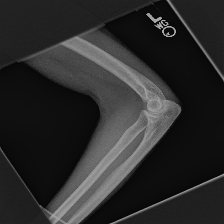

In [0]:
#XR_ELBOW_patients[40]
img = Image.fromarray(XR_ELBOW_patients[9])
img

In [0]:
target.shape

In [0]:
target[8]

0

In [0]:
features=numpy.array(XR_ELBOW_patients)
y= to_categorical(target)

In [0]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

W0803 11:54:05.219887 140294604552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 11:54:05.272280 140294604552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 11:54:05.279244 140294604552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 11:54:05.333224 140294604552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0803 11:54:05.351343 140294604552064 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [0]:
!pip install livelossplot neptune-cli tensorboardcolab

In [0]:
from keras import optimizers
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [0]:
from livelossplot.keras import PlotLossesCallback

In [0]:
model.fit(features.reshape(-1,224,224,3), y,
              validation_split=0.2,
            epochs=50,callbacks=[PlotLossesCallback()],verbose=0,shuffle=True)

In [33]:
from keras.layers import Input
vgg_model = applications.VGG16(weights='imagenet',include_top=True)

W0804 04:43:09.723771 140568539576192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 04:43:09.745043 140568539576192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 04:43:09.749686 140568539576192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 04:43:09.779997 140568539576192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0804 04:43:11.842154 140568539576192 deprecation_wrapp

In [0]:
for layer in vgg_model.layers: layer.trainable=False

In [0]:
x = vgg_model.layers[-2].output
output_layer = Dense(2, activation='softmax', name='predictions')(x)

In [0]:
vgg2 = Model(inputs=vgg_model.input, outputs=output_layer)

In [37]:
vgg2.compile(optimizer='Adam',
                loss='categorical_crossentropy', metrics=['accuracy'])

W0804 04:44:08.979117 140568539576192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [69]:
vgg2.fit(x=features,y=y,batch_size=250,epochs=10,validation_split=0.3)

Train on 90 samples, validate on 39 samples
Epoch 1/10


KeyboardInterrupt: ignored

In [0]:
vgg_model.summary()

In [0]:
test_image=cv2.imread('/content/gdrive/My Drive/Data Science/sample_XR_ELBOW/patient00011/study1_negative/image2.png')

In [0]:
test_image

In [0]:
test_image=cv2.resize(test_image, (224,224))

In [0]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(test_image)

In [0]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [0]:
preds = vgg2.predict(image.reshape(-1,224,224,3))

In [0]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [0]:
print('Predicted:', decode_predictions(preds, top=3)[0])

In [79]:
preds = vgg2.predict(test_image.reshape(-1,224,224,3))
preds

array([[0.62271714, 0.37728283]], dtype=float32)

In [74]:
label = decode_predictions(preds)

ValueError: ignored

In [0]:
vgg_model.predict(test_image.reshape(-1,224,224,3))

In [0]:
images[n] = cv2.imread( join(pathgt,onlyfiles[n]) )
images[n]=cv2.resize(images[n], (224,224)) 

In [23]:
#Sample for reading an image
from os import listdir
from os.path import isfile, join
import numpy
import cv2

path_image = "/content/gdrive/My Drive/Data Science/sample_XR_ELBOW/patient00011/study1_negative"
onlyfiles = [ f for f in listdir(path_image) if isfile(join(path_image,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object) #Checking if its empty
print(images)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(path_image,onlyfiles[n]) )

[None None None]


In [0]:
#Snippet for showing an image from array format
#img = image.load_img(images[0])
from PIL import Image
img = Image.fromarray(images[0])
img

In [0]:
XR_ELBOW_patients_neg[0]

In [0]:
img = Image.fromarray(XR_ELBOW_patients_neg[0])
img

In [0]:
img_path = (path_image+'/'+'patient00665'+'/'+'study1_negative'+'/'+'image1.png')
img = image.load_img(img_path)
img1 = image.img_to_array(img)
img

In [0]:
onlyfiles

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
for i in range(len(name_list))

In [0]:
img1

In [0]:
# importing PIL 
from PIL import Image 
  
# Read image 
img = Image.open(path_image+'/'+'patient00665'+'/'+'study1_negative'+'/'+'image1.png') 
  
# Output Images 
img.show() 
  
# prints format of image 
#print(img.format) 
  
# prints mode of image 
#print(img.mode) 

In [0]:
images=cv.imread(path_image+'/'+'patient00665'+'/'+'study1_negative')
cv2_imshow('image', images)  
#images=cv.resize(images, (224,224)) 
import cv2 
  
# Save image in set directory 
# Read RGB image 
img = cv2.imread('g4g.png')  
  
# Output img with window name as 'image' 
cv2.imshow('image', img)  

In [0]:
path_image = "/content/gdrive/My Drive/Data Science/sample_XR_ELBOW"
name_list=os.listdir(path_image)
list_folders=[]
for i in range(len(name_list)):
  gt=os.listdir(path_image+'/'+name_list[i])
  list_folders.append(gt)

In [0]:
XR_ELBOW_patients_pos

In [0]:
XR_ELBOW_patients_neg

In [0]:
neg_elbow_imgs = []
pos_elbow_imgs = []
j = 0
for i in range(len(elbow_list)):
    gt = os.listdir(XR_ELBOW_path+'/'+elbow_list[i])
    #print(gt)
    #print(t[0][7:])
    if(gt[0][7:]=="negative"):
        for j in range(len(XR_ELBOW_patients_neg)):
            gt1 = os.listdir(XR_ELBOW_path+'/'+elbow_list[i]+'/'+str(XR_ELBOW_patients_neg[j][0]))
            neg_elbow_imgs.append(gt1)
            #print(gt1)
    else:
         for j in range(len(XR_ELBOW_patients_pos)):
            gt1 = os.listdir(XR_ELBOW_path+'/'+elbow_list[i]+'/'+str(XR_ELBOW_patients_pos[j][0]))
            pos_elbow_imgs.append(gt1)
            #print(gt1)
        
            
        #   
        #print(gt)
        #gt1 = os.listdir(XR_ELBOW_path+'/'+elbow_list[0]+'/'+str(XR_ELBOW_patients_pos[i][0]))
        #pos_elbow_imgs.append(gt1)
    #else:
        #gt = os.listdir(XR_ELBOW_path+'/'+elbow_list[0]+'/'+str(XR_ELBOW_patients_pos[i][0]))
        #pos_elbow_imgs.append(gt)

In [0]:
neg_elbow_imgs

[['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.png', 'image2.png', 'image3.png'],
 ['image1.

In [0]:
def extract(num):
  sample_pos1=pos_elbow_imgs[0:num]
  sample_neg1=neg_elbow_imgs[0:num]
  return [sample_pos1,sample_neg1]

In [0]:
data = extract(10)
data

[[['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png'],
  ['image1.png', 'image2.png', 'image3.png']]]

In [0]:
#Extracting Images
for x in data:
    for i in range(len(x)):
        y =len(x[i])
        #print(y)
        for j in range(len(x[i])):
            #images=cv.imread(XR_ELBOW_path+'/'+elbow_list[i]+'/'+str(x[i][j])
            print(x[i][j])
            
        #
        #for(j <= y):
            #print(x[i][j])
            
            #print(x[i][j:])
        #print(x[i])
    #print(x)
    #for i in range(len(x)):
        
        #for j in range(len(x[i])):
            #print(x[i])
        
        
    
    #images=cv.imread(path_image+'/'+name_list[j]+'/'+x[i][0])
    #images=cv.resize(images, (224,224)) 
    #print(x)

In [0]:
images=cv.imread(XR_ELBOW_path+'/'+str(elbow_list[0])+'/'+str(data[0][0]))
images=cv.resize(images, (224,224)) 

for i in range(len(elbow_list)):
    gt = os.listdir(XR_ELBOW_path+'/'+elbow_list[i])
    #print(gt)
    #print(t[0][7:])
    if(gt[0][7:]=="negative"):
        for j in range(len(XR_ELBOW_patients_neg)):
            gt1 = os.listdir(XR_ELBOW_path+'/'+elbow_list[i]+'/'+str(XR_ELBOW_patients_neg[j][0]))

In [0]:
training=[]
target=[]
j=0
for x in data:
  for i in range(len(x)):
    images=cv.imread(XR_ELBOW_path+'/'+elbow_list[i]+'/'+str(x[j][0])
    #images=cv.resize(images, (224,224)) 
    print(x)
    #if x[0][0:3]=='dog': #it is taking first row in which first three words are checked as dog
      #target.append(0)
    #else:
      #target.append(1)
    #training.append(images)
  j=j+1

[['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive']]
[['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive']]
[['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive']]
[['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive']]
[['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1_positive'], ['study1

In [0]:
os.path.join(XR_FINGER_patients+'/'+"CSV")

In [0]:
XR_ELBOW_patients1 = []
XR_FINGER_patients1 = []
for i in range(len(XR_ELBOW_patients)):
    gt = os.listdir(home_path+'/'+XR_ELBOW_patients[i])
    XR_ELBOW_patients1.append(gt)
    #if(name_list[i]==''):
        
    #elif(name_list[i]=='XR_FINGER_patients'):
        #gt = os.listdir(home_path+'/'+name_list[i])
        #XR_FINGER_patients1.append(gt)

TypeError: can only concatenate str (not "list") to str

In [0]:
sample_finger = XR_FINGER_patients[0][0:10]
sample_finger

['patient00011',
 'patient00042',
 'patient00050',
 'patient00114',
 'patient00127',
 'patient00169',
 'patient00192',
 'patient00195',
 'patient00206',
 'patient00226']

In [0]:
sample_elbow = XR_ELBOW_patients[0][0:10]

In [0]:
images